# The Sorting Hat 
The sorting hat assigns new witches and wizards into the houses that they will join for the remainder of their stay at Hogwarts. ![Sorting Hat](https://vignette.wikia.nocookie.net/harrypotter/images/6/62/Sorting_Hat.png/revision/latest?cb=20161120072849)Presumably, the Hat uses some **prior knowledge** to inform its decision of where a student will best fit in. From a Machine Learning perspective we could view this process as a **classification** task: given some **labeled** data (for example, information about previous Hogwarts students (the **data**) and which house they belonged to (the **label/class**)) can we build a model that can **predict** which house a new student belongs to. 

### In order to understand the magical ways of the Hat, we will perform the following:
1. Generate a dataset *...mmhhm...* I mean survey some previous Hogwarts students
2. Do some basic visualization to investigate how our features separate the classes
3. Teach a machine learning model about previous students
4. Predict your house and visualize where you stand relative to past students!

# (1) Generate dataset
The Sorting Hat itself has been endowed with years upon years of knowledge about different students. Unforunately the Hat wasn't available to send me all of its data, so we will have to generate it ourself. In my opinion, generating datasets is a valuable exercise in and of itself. A machine learning dataset consists of a few components: **samples** (in this case, students), **features** (measured characteristics), and **class labels** (in this case, the house each student belonged to). In general, a machine learning **training set** (the dataset which contains previous measurements we wish to learn from), looks like this:

| Sample | Feature 1 | $\cdot\cdot\cdot$ | Feature N | Class |
| --- | --- | --- | --- | --- |
| Sample$_1$ | Observation$_{1,1}$ | $\cdot\cdot\cdot$ | Observation$_{1,N}$ | Class$_1$ |
|  $\cdot\cdot\cdot$ |  $\cdot\cdot\cdot$ | $\cdot\cdot\cdot$ | $\cdot\cdot\cdot$| $\cdot\cdot\cdot$ |
| Sample$_M$ | Observation$_{M,1}$ | $\cdot\cdot\cdot$ | Observation$_{M,N}$ | Class$_M$ |

Now, we have to imagine that the Sorting Hat has gathered information on all sorts of features, some of which will have more discriminatory power than others. For example, below is the height distribution of the students from each house and as we can see it doesn't seem like this feature provides much discriminatory power between the different classes (as in, if all we knew about as the height of students we would have very little ability to distinguish which ones belonged to which house).

![Height distribution](figures/height_dist.png)

So, to generate our mock dataset, we will choose a few features that we believe the Hat has observed and the characteristic distribution of that feature per each house (this will make sense soon)! 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_feature(means, stds, n, labels, seed=None):
    """
    Generate feature data assuming features are normally distributed.
    For each input parameter, either a list (associated with the order of `labels`) or a single value can be passed. 
        Passing a single value will assume that all classes share that parameter
    Inputs:
    | means: <list> or <float> Mean(s) of feature distribution
    | stds: <list> or <float> Standard deviation(s) of feature distribution
    | n: <list> or <float> Number of samples for each class
    | labels: <array> List of labels (this order is associated with the other passed parameters)
    | seed: <int> Random seed for sampling
    Output:
    | data: <n x 2 array> Data for single feature where each sample is labeled by class
    """
    # If any inputs are single values, convert them to lists
    if np.isscalar(means):
        means = [means]*len(labels)
    if np.isscalar(stds):
        stds = [stds]*len(labels)
    if np.isscalar(n):
        n = [n]*len(labels)
    # Assign parameters to each class
    params = {label: {'mean': m, 'std': s, 'n': size} for label, m, s, size in zip(labels, means, stds, n)}
    
    # Generate data
    if seed:
        np.random.seed(seed)
    ## For each class, sample `n` points from a normal distribution with that classes mean and standard deviation
    data = [[x, label] for label in labels for x in np.random.normal(params[label]['mean'], params[label]['std'], params[label]['n'])]
    return data

houses = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
palette = dict(zip(houses, ['red', 'gold', 'lightblue', 'green']))

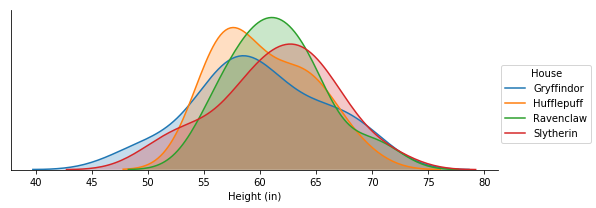

In [75]:
mean_height = 5*12+7/12
std = 5
n = 20
data = generate_feature(mean_height, std, n, houses, 1)
df = pd.DataFrame(data, columns=['height', 'house'])
g = sns.FacetGrid(df, hue='house', aspect=2.5)
g.map(sns.kdeplot, 'height', shade=True).add_legend(title='House')
plt.xlabel('Height (in)')
plt.yticks([])
plt.savefig('figures/height_dist')
plt.show()